In [ ]:
#Install packages
!pip install rasterio
!pip install rastertodataframe
!pip install pyproj
!pip install geopandas
!pip install osgeo

In [2]:
#Import Base Libraries
import pandas as pd
import numpy as np
import glob

#Import Raster Libraries
import rasterio
from rastertodataframe import raster_to_dataframe

#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from rasterio.plot import show

In [3]:
#Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Area Tiff Files

Read in Tiff files of area and merge.

In [ ]:
#function to turn tiff to df
def tiff_to_df_colab(path):
  """
  Input - File path that contains tiff files
  Output - Pandas dataframe of all raster layer values 
  """
  #Create folder path and list variables
  folder_path = path
  file_list = glob.glob(folder_path + "/*.tiff")

  #initiate empty dataframe
  main_dataframe = pd.DataFrame()

  for i in file_list:
    data = raster_to_dataframe(i)
  
    #extract name of band from file path
    band_info = str(i).split('/')[-1]
    band_name = band_info[-14:-11]
    #rename with band name
    data = data.rename(columns = {'Band_1': band_name})
    #merge into main dataframe
    main_dataframe = pd.concat([main_dataframe, data], axis = 1)

  return main_dataframe

In [ ]:
#Create folder path variable
folder_path = '/content/drive/MyDrive/AISC/North_Quebec'

#Create dataframe
data = tiff_to_df_colab(folder_path)
data.head()

,B8A,B04,B06,B12,B08,B09,B05,B03,B02,B11,B07,B01
0,0.6466,0.8316,0.7817,0.0395,0.7191,0.5394,0.8245,0.8558,0.8676,0.0398,0.6992,0.7392
1,0.4784,0.7040,0.6203,0.0334,0.5312,0.5231,0.6990,0.7461,0.7360,0.0342,0.5596,0.7327
2,0.5136,0.7232,0.6461,0.0355,0.5732,0.5784,0.7175,0.7686,0.7683,0.0367,0.5916,0.7715
3,0.6862,0.8756,0.8271,0.0383,0.7641,0.6669,0.8736,0.8992,0.9153,0.0385,0.7559,0.8387
4,0.6921,0.8930,0.8393,0.0400,0.7711,0.6909,0.8860,0.9236,0.9365,0.0405,0.7649,0.8690


## NARCAN Data

Upload the clipped and transformed NRCANN Data

Merge with main_dataframe

In [36]:
#Path for raster data from NRCAN
data_path = '/content/drive/MyDrive/AISC/Badlands.tif'

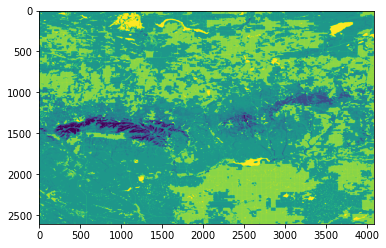

In [37]:
#Open data with rasterio
img = rasterio.open(data_path)
show(img, 0)

In [38]:
#Read the image
array = img.read()

#Create numpy array
array = np.array(array)

#Check shape
array.shape

(1, 2605, 4089)

In [39]:
#Read NRCAN raster to dataframe
nrcann = raster_to_dataframe(data_path)
nrcann.head()

,Band_1
0,10
1,10
2,10
3,10
4,10


In [40]:
#Rename column
nrcann = nrcann.rename(columns={'Band_1':'Class'})

#Print sum of classification types
print('Number of NRCANN Classes: ', nrcann.Class.nunique())

#Check which classifications are listed
print(nrcann.Class.value_counts())

Number of NRCANN Classes:  10
10    5521782
15    3309302
8      892188
18     318584
17     191749
5      173115
1      122565
16      77611
6       28970
14      15979
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Land Cover Density')

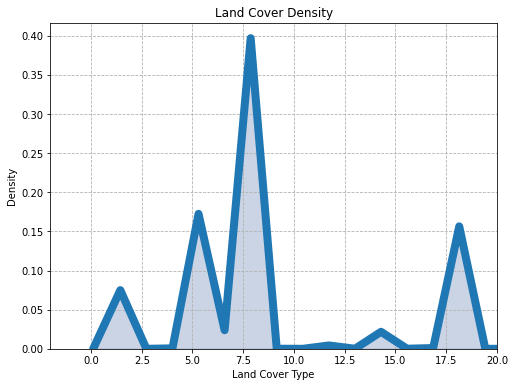

In [25]:
#Plot Class distribution
plt.figure(figsize=[8,6])
plt.grid(linestyle='--')
dp = sns.distplot(nrcann.Class, hist=False, kde_kws=dict(linewidth=8))
l1 = dp.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
dp.fill_between(x1,y1, color="#5471ab", alpha=0.3)
dp.set_xlim(-2, 20)
dp.set_xlabel("Land Cover Type")
dp.set_title("Land Cover Density")

In [ ]:
#Merge nrcann with data
data = pd.concat([data, nrcann], axis=1)
data.head()

,B8A,B04,B06,B12,B08,B09,B05,B03,B02,B11,B07,B01,Class
0,0.6466,0.8316,0.7817,0.0395,0.7191,0.5394,0.8245,0.8558,0.8676,0.0398,0.6992,0.7392,18
1,0.4784,0.7040,0.6203,0.0334,0.5312,0.5231,0.6990,0.7461,0.7360,0.0342,0.5596,0.7327,18
2,0.5136,0.7232,0.6461,0.0355,0.5732,0.5784,0.7175,0.7686,0.7683,0.0367,0.5916,0.7715,18
3,0.6862,0.8756,0.8271,0.0383,0.7641,0.6669,0.8736,0.8992,0.9153,0.0385,0.7559,0.8387,18
4,0.6921,0.8930,0.8393,0.0400,0.7711,0.6909,0.8860,0.9236,0.9365,0.0405,0.7649,0.8690,18


In [ ]:
#Save merged data
data.to_csv('/content/drive/MyDrive/n_qc2_land_class_data.csv', index = False)